In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## Explanation

**Slot Machine Problem**

- P(success) = num of times won / num of times played

**Maximum likelihood estimation (MLE)** 

MLE is a statistical method used to estimate the parameters of a probability distribution by maximising a likelihood function, thus making the observed data most probable. This technique is widely used for parameter estimation in various probabilistic models.

Greedy algorithms and MLE both seek optimal solutions through sequential choices, with greedy algorithms focusing on immediate benefits at each step, while MLE aims to maximise the overall likelihood of observed data. While different in application, they share a common principle of optimisation in decision-making processes.

**Two opposing forces**

- collect more data (*exploration*)
- select chose with highest win rate (*exploitation*)

Here we will go through 4 algorithms to solve the explore-exploit dilemma:
- epsilon-greedy
- optimistic initial values
- ucb1 (upper confidence bound)
- thompson sampling (bayesian bandit)

These methods can replace the traditional AB testing. These methods are adaptive and effective in high throughput business settings.

## Epsilon-Greedy Theory

The Epsilon-Greedy algorithm is a method used in machine learning to balance between exploring new options and exploiting known ones to maximise rewards. 

The term *greedy* refers to always choosing the option with the best current MLE of winning or success, without considering long-term outcomes or the confidence in those estimates. This can be short-sighted as it relies solely on immediate information.

However, it includes a small probability of choosing something random (non-greedy). The small probability is given by the **epsilon** symbol (5% or 10%).

In [ ]:
# Pseudocode

# greedy
while True:
    j = argmax(predicted bandit means)
    x = play bandit j and get reward
    bandits[j].update_mean(x)
    
# epsilon-greedy
while True:
    p = random number in [0,1]
    
    if p < epsilon:
        j = choose a random bandit
    else:
        j = argmax(predicted bandit means)
    
    x = play bandit j and get reward
    bandits[j].update_mean(x)
    
    

The reason for incorporating exploration in algorithms (using a non-zero epsilon value) is to gather data about each option or *bandit* in a multi-armed bandit problem.

It raises the question of what constitutes 'enough' data and whether it's suboptimal to continue exploring indefinitely. For instance, with two bandits having win rates of 90% and 80%, the expected reward `(E(R))` is calculated by a weighted average of the best bandit's reward (90% in this case) and the average reward of all bandits, with weights determined by `1−ϵ` and `ϵ` respectively.

In [10]:
epsilon = 0.05  # Example epsilon value
reward_bandit_1 = 0.9  # Reward rate for bandit 1
reward_bandit_2 = 0.8  # Reward rate for bandit 2

expected_reward = (1 - epsilon) * reward_bandit_1 + epsilon * ((reward_bandit_1 + reward_bandit_2) / 2)
expected_reward

0.8975

### Decaying Epsilon

Epsilon decreases inversely with time, providing a gradual transition from exploration to exploitation.

In [13]:
def epsilon_decay_inverse(t):
    return 1 / t


In [15]:
time_steps = 100
epsilon_values = []

for t in range(1, time_steps + 1):
    epsilon = round(epsilon_decay_inverse(t), 2)
    epsilon_values.append(epsilon)
    
print(epsilon_values[:10])

[1.0, 0.5, 0.33, 0.25, 0.2, 0.17, 0.14, 0.12, 0.11, 0.1]


In [25]:
# Define the inverse decay function for epsilon
def epsilon_decay_inverse(t):
    return 1 / t

# Define the initial reward rates for two bandits
reward_bandit_1 = 0.9  # Reward rate for bandit 1
reward_bandit_2 = 0.8  # Reward rate for bandit 2

# Initialise lists to hold the values over time
time_steps = 100
epsilon_values = [epsilon_decay_inverse(t) for t in range(1, time_steps + 1)]
expected_rewards = []

# Calculate the expected reward for each time step using the inverse decayed epsilon
for epsilon in epsilon_values:
    expected_reward = (1 - epsilon) * reward_bandit_1 + epsilon * ((reward_bandit_1 + reward_bandit_2) / 2)
    expected_rewards.append(expected_reward)
    

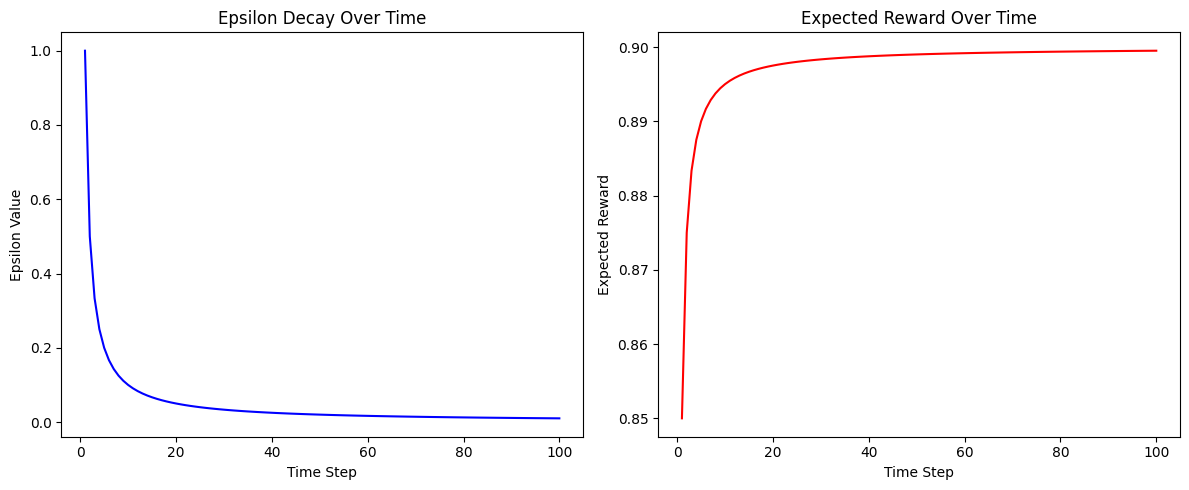

In [32]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot epsilon decay
ax1.plot(range(1, time_steps + 1), epsilon_values, 'b-')
ax1.set_title('Epsilon Decay Over Time')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Epsilon Value')

# Plot expected reward
ax2.plot(range(1, time_steps + 1), expected_rewards, 'r-')
ax2.set_title('Expected Reward Over Time')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Expected Reward')

plt.tight_layout();

Epsilon decreases linearly over time until it reaches a predefined minimum value, after which it does not decrease further, maintaining a minimum level of exploration.

In [36]:
def epsilon_decay_linear(t, epsilon_0, k, epsilon_min):
    return np.maximum(epsilon_0 - k * t, epsilon_min)


In [43]:
# Initialise lists to hold the values over time
time_steps = 100
epsilon_0 = 1.0  # start with full exploration
k = 0.01  # decay rate
epsilon_min = 0.01  # always retain at least 1% exploration

epsilon_linear = [epsilon_decay_linear(t, epsilon_0, k, epsilon_min) for t in range(1, time_steps + 1)]
expected_rewards = []

# Define initial reward rates
reward_bandit_1 = 0.9
reward_bandit_2 = 0.8

# Calculate the expected reward for each time step using the linearly decayed epsilon
for epsilon in epsilon_linear:
    expected_reward = (1 - epsilon) * reward_bandit_1 + epsilon * ((reward_bandit_1 + reward_bandit_2) / 2)
    expected_rewards.append(expected_reward)


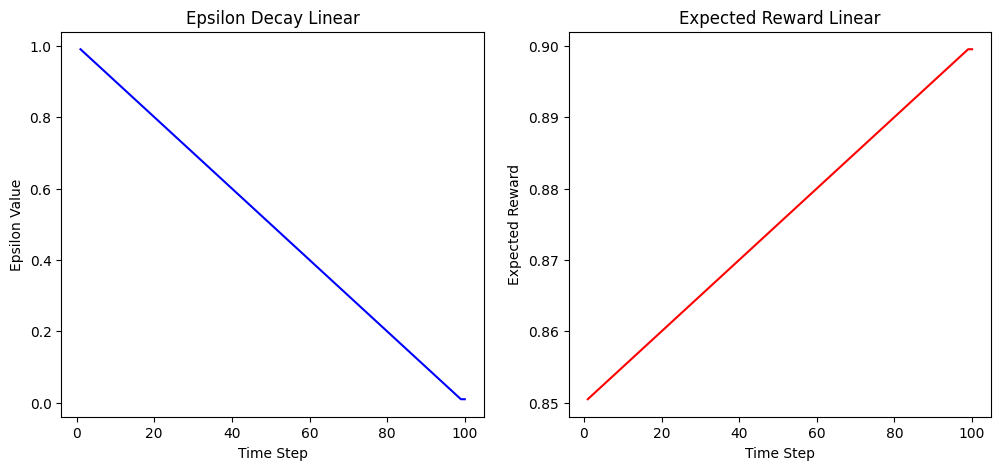

In [44]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot epsilon decay
ax1.plot(range(1, time_steps + 1), epsilon_linear, 'b-')
ax1.set_title('Epsilon Decay Linear')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Epsilon Value')

# Plot expected reward
ax2.plot(range(1, time_steps + 1), expected_rewards, 'r-')
ax2.set_title('Expected Reward Linear')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Expected Reward')

plt.show()  # Display the plots
